In [5]:
import os
import numpy as np
import pandas as pd
#import datetime
import rasterio
from osgeo import gdal
from matplotlib import pyplot

In [6]:
# Load data
train_df = pd.read_csv('/Users/felixbehrendt/neuefische/Radiant-Earth-Spot-Crop/data/train_data.csv')

In [3]:
train_df.labels

,tile_id,datetime,satellite_platform,asset,file_path
0,2587,NaN,NaN,documentation,./data/ref_south_africa_crops_competition_v1_t...
1,2587,NaN,NaN,field_ids,./data/ref_south_africa_crops_competition_v1_t...
2,2587,NaN,NaN,field_info_train,./data/ref_south_africa_crops_competition_v1_t...
3,2587,NaN,NaN,labels,./data/ref_south_africa_crops_competition_v1_t...
4,2587,NaN,NaN,raster_values,./data/ref_south_africa_crops_competition_v1_t...
5,2587,2017-04-01T00:00:00Z,s2,B02,./data/ref_south_africa_crops_competition_v1_t...
6,2587,2017-04-01T00:00:00Z,s2,B03,./data/ref_south_africa_crops_competition_v1_t...
7,2587,2017-04-01T00:00:00Z,s2,B04,./data/ref_south_africa_crops_competition_v1_t...
8,2587,2017-04-01T00:00:00Z,s2,B08,./data/ref_south_africa_crops_competition_v1_t...
9,2587,2017-04-01T00:00:00Z,s2,B11,./data/ref_south_africa_crops_competition_v1_t...


In [7]:
# April Data
train_april = train_df.loc[(train_df['datetime'] <= '2017-04-02T00:00:00+0000')]
train_april

,tile_id,datetime,satellite_platform,asset,file_path
5,2587,2017-04-01T00:00:00Z,s2,B02,./data/ref_south_africa_crops_competition_v1_t...
6,2587,2017-04-01T00:00:00Z,s2,B03,./data/ref_south_africa_crops_competition_v1_t...
7,2587,2017-04-01T00:00:00Z,s2,B04,./data/ref_south_africa_crops_competition_v1_t...
8,2587,2017-04-01T00:00:00Z,s2,B08,./data/ref_south_africa_crops_competition_v1_t...
9,2587,2017-04-01T00:00:00Z,s2,B11,./data/ref_south_africa_crops_competition_v1_t...
...,...,...,...,...,...
1023982,2198,2017-04-01T00:00:00Z,s2,B04,./data/ref_south_africa_crops_competition_v1_t...
1023983,2198,2017-04-01T00:00:00Z,s2,B08,./data/ref_south_africa_crops_competition_v1_t...
1023984,2198,2017-04-01T00:00:00Z,s2,B11,./data/ref_south_africa_crops_competition_v1_t...
1023985,2198,2017-04-01T00:00:00Z,s2,B12,./data/ref_south_africa_crops_competition_v1_t...


In [31]:
df_b02_april = train_april.loc[(train_april['asset'] == 'B02')]
df_b03_april = train_april.loc[(train_april['asset'] == 'B03')]
df_b04_april = train_april.loc[(train_april['asset'] == 'B04')]

In [ ]:
test = rasterio.open(df_b02_april.file_path.iloc[0]).bounds

In [30]:
cmd_blue = 'gdal_merge.py -o merged_blue.tif'
cmd_green = 'gdal_merge.py -o merged_green.tif'
cmd_red = 'gdal_merge.py -o merged_red.tif'

In [32]:
subprocess.call(cmd_blue.split()+df_b02_april.file_path.to_list())
subprocess.call(cmd_green.split()+df_b03_april.file_path.to_list())
subprocess.call(cmd_red.split()+df_b04_april.file_path.to_list())


0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.
0...10...20...30...40...50...60...70...80...90...100 - done.


0

In [41]:
from osgeo import gdal
file_list = ['/Users/felixbehrendt/neuefische/Radiant-Earth-Spot-Crop/merged_blue.tif', '/Users/felixbehrendt/neuefische/Radiant-Earth-Spot-Crop/merged_green.tif', '/Users/felixbehrendt/neuefische/Radiant-Earth-Spot-Crop/merged_red.tif']  # or use sorted(glob.glob('*.tif')) if input images are sortable
import rasterio


# Read metadata of first file
with rasterio.open(file_list[0]) as src0:
    meta = src0.meta

# Update meta to reflect the number of layers
meta.update(count = len(file_list))

# Read each layer and write it to stack
with rasterio.open('stack.tif', 'w', **meta) as dst:
    for id, layer in enumerate(file_list, start=1):
        with rasterio.open(layer) as src1:
            dst.write_band(id, src1.read(1))

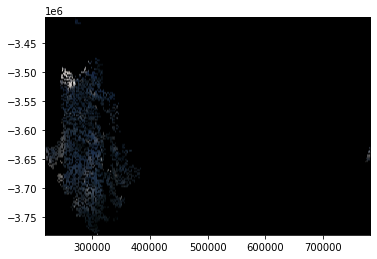

<AxesSubplot:>

In [45]:
from rasterio.plot import show
tif = rasterio.open('/Users/felixbehrendt/neuefische/Radiant-Earth-Spot-Crop/stack.tif')
show(tif.read(), transform=tif.transform)

In [8]:
fields = train_df.loc[(train_df['asset'] == 'field_ids')]

In [51]:
import subprocess

cmd = 'gdal_merge.py -o field.tif'
subprocess.call(cmd.split()+fields.file_path.to_list())

0...10...20...30...40...50...60...70...80...90...100 - done.


0

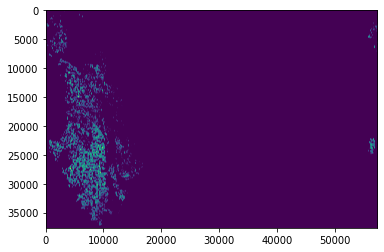

<AxesSubplot:>

In [52]:
from rasterio.plot import show
tif = rasterio.open('/Users/felixbehrendt/neuefische/Radiant-Earth-Spot-Crop/field.tif')
show(tif.read())

In [53]:
fields

,tile_id,datetime,satellite_platform,asset,file_path
1,2587,NaN,NaN,field_ids,./data/ref_south_africa_crops_competition_v1_t...
272,1302,NaN,NaN,field_ids,./data/ref_south_africa_crops_competition_v1_t...
543,1130,NaN,NaN,field_ids,./data/ref_south_africa_crops_competition_v1_t...
814,486,NaN,NaN,field_ids,./data/ref_south_africa_crops_competition_v1_t...
1351,1554,NaN,NaN,field_ids,./data/ref_south_africa_crops_competition_v1_t...
...,...,...,...,...,...
1022360,2508,NaN,NaN,field_ids,./data/ref_south_africa_crops_competition_v1_t...
1022897,1977,NaN,NaN,field_ids,./data/ref_south_africa_crops_competition_v1_t...
1023168,99,NaN,NaN,field_ids,./data/ref_south_africa_crops_competition_v1_t...
1023439,1379,NaN,NaN,field_ids,./data/ref_south_africa_crops_competition_v1_t...


In [9]:
def get_bounding_left(path_to_file:str):
    return rasterio.open(path_to_file).bounds[0]

def get_bounding_bottom(path_to_file:str):
    return rasterio.open(path_to_file).bounds[1]

def get_bounding_right(path_to_file:str):
    return rasterio.open(path_to_file).bounds[2]

def get_bounding_top(path_to_file:str):
    return rasterio.open(path_to_file).bounds[3]

fields['rightBounding'] = fields.file_path.apply(get_bounding_right)
fields['leftBounding'] = fields.file_path.apply(get_bounding_left)
fields['bottomBounding'] = fields.file_path.apply(get_bounding_bottom)
fields['topBounding'] = fields.file_path.apply(get_bounding_top)


/var/folders/f0/z8td26157zjfjs53z8lhrpch0000gn/T/ipykernel_35607/3543020036.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fields['rightBounding'] = fields.file_path.apply(get_bounding_right)
/var/folders/f0/z8td26157zjfjs53z8lhrpch0000gn/T/ipykernel_35607/3543020036.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fields['leftBounding'] = fields.file_path.apply(get_bounding_left)
/var/folders/f0/z8td26157zjfjs53z8lhrpch0000gn/T/ipykernel_35607/3543020036.py:15: SettingWithCopyWarning: 
A value is

In [10]:
wrong_tile_id = fields.query('rightBounding > 400000').tile_id.to_list()
wrong_tile_id

[2314,
 2516,
 442,
 480,
 2189,
 1959,
 871,
 935,
 555,
 2400,
 1849,
 2038,
 1279,
 2096,
 522,
 2078,
 728,
 1600,
 1434,
 1092,
 988,
 546,
 1458,
 601,
 630,
 2504,
 95,
 469,
 457,
 880,
 1999,
 2178,
 2583,
 2548,
 1906,
 2541,
 1398,
 424,
 286,
 2540,
 1558,
 477,
 708,
 2299,
 391,
 1680,
 1226,
 2291,
 700,
 1274,
 352,
 1476,
 306,
 1805,
 1650,
 740,
 1692,
 1293,
 2086,
 1055,
 510,
 1851,
 2481,
 784,
 511,
 186,
 2421,
 1439,
 527,
 1401,
 2554,
 497,
 2394,
 2360,
 1378,
 2163,
 866,
 39,
 805,
 462,
 1315,
 1180]

In [70]:
fields

,tile_id,datetime,satellite_platform,asset,file_path,rightBounding,leftBounding,bottomBounding,topBounding
1,2587,NaN,NaN,field_ids,./data/ref_south_africa_crops_competition_v1_t...,277280.0,274720.0,-3719680.0,-3717120.0
272,1302,NaN,NaN,field_ids,./data/ref_south_africa_crops_competition_v1_t...,323360.0,320800.0,-3545600.0,-3543040.0
543,1130,NaN,NaN,field_ids,./data/ref_south_africa_crops_competition_v1_t...,284960.0,282400.0,-3676160.0,-3673600.0
814,486,NaN,NaN,field_ids,./data/ref_south_africa_crops_competition_v1_t...,290080.0,287520.0,-3609600.0,-3607040.0
1351,1554,NaN,NaN,field_ids,./data/ref_south_africa_crops_competition_v1_t...,282400.0,279840.0,-3573760.0,-3571200.0
...,...,...,...,...,...,...,...,...,...
1022360,2508,NaN,NaN,field_ids,./data/ref_south_africa_crops_competition_v1_t...,254240.0,251680.0,-3630080.0,-3627520.0
1022897,1977,NaN,NaN,field_ids,./data/ref_south_africa_crops_competition_v1_t...,310560.0,308000.0,-3745280.0,-3742720.0
1023168,99,NaN,NaN,field_ids,./data/ref_south_africa_crops_competition_v1_t...,300320.0,297760.0,-3732480.0,-3729920.0
1023439,1379,NaN,NaN,field_ids,./data/ref_south_africa_crops_competition_v1_t...,249120.0,246560.0,-3607040.0,-3604480.0


In [11]:
sub_fields = fields[~np.isin(fields.tile_id, wrong_tile_id)]
sub_fields

bounding_box = [sub_fields.leftBounding.min(), sub_fields.bottomBounding.min(), sub_fields.rightBounding.max(), sub_fields.topBounding.max()]
bounding_box

[213280.0, -3781120.0, 384800.0, -3404800.0]

In [2]:
import rioxarray

In [26]:
test = rioxarray.open_rasterio('/Users/felixbehrendt/neuefische/Radiant-Earth-Spot-Crop/field.tif')
sub_test = rioxarray.open_rasterio(sub_fields.file_path.iloc[0])

sub_test.rio.crs

CRS.from_epsg(32634)

In [ ]:
out_xds = test.copy()

In [13]:
import numpy
import rioxarray
from shapely.geometry import mapping



In [19]:
import geopandas as gpd
from shapely.geometry import box
import matplotlib.pyplot as plt

# Create bounds object to clip the cloud free data
landsat_pre_cloud_ext_bds = sub_test.rio.bounds()

df = {'id': [1],
      'geometry': box(*sub_test.rio.bounds())}
clip_gdf = gpd.GeoDataFrame(df, crs=sub_test.rio.crs)

clip_gdf

,id,geometry
0,1,"POLYGON ((277280.000 -3719680.000, 277280.000 ..."


In [27]:
clip_gdf.set_crs("EPSG:32634")
clip_gdf

,id,geometry
0,1,"POLYGON ((277280.000 -3719680.000, 277280.000 ..."


In [28]:
clipped = test.rio.clip(clip_gdf.geometry, clip_gdf.crs)
clipped.plot()

: 

: 